# _Python for Scientific Data Analysis_

# SciPy

## Section 3: Statistics (continued)


In [35]:
#preliminaries, as before
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import scipy

#and because this is a Jupyter notebook
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=[8,6]

### Distributions of Data

SciPy's stats subpackage contains a lot of ways to compute probability distributions.  We subdivide these distributions up into two: continuous distributions and discrete distributions.

  

#### _Continuous Distributions_ 

Some examples of continuous distributions are ``norm`` (normal distribution), ``gamma`` (gamma distribution), ``uniform`` (uniform distribution). Each object of continuous distributions comes with many useful methods, such as its PDF (probability density function), its CDF (cumulative distribution function), etc. 

What do we mean by these terms? 

**Normal (Gaussian)** -- A normal distribution (aka a Gaussian distribution) is a bell-shaped distribution with a sharp drop in the "tails" of the distribution (i.e. outside the "bell").   It can be represented by the functional form

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-0.5((x-\mu)/\sigma)^{2}}$,

where $\mu $ is the mean of the distribution, $\sigma$ is the standard deviation, and the variance is $\sigma^{2}$.  The width of the bell is described usually as the "full width at half-maximum" (FWHM) which is $FWHM = 2\sqrt{2 ln2}$ $\sigma$ $\approx$ 2.36 $\sigma$.

**Log-Normal (Gaussian)**

This distribution is similar, with a probability density distribution of $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-0.5((lnx-\mu)/\sigma)^{2}}$.

Here, instead of the value of a variable is not normally distributed but the log of that value is normally distributed.

 _Density Functions_ 

The "Probability Density Function" (PDF) is the probability per unit length of a continuous random variable, giving a _relative_ likelihood of some value.  I.e. since values for the variable are continuous, not discrete, the probability of any one value is vanishingly small, but probably over some $\delta$length can be large.

The "Cumulative Density Function" (CDF) of a function $f$ with a range of values $X$, evaluated at value $x$, is the probabilty that $X$ will have a value less than or equal to $x$: f$_{X}(x)$ = $P(X \le x)$. 

_Example_

Below is an example of a normal distribution with a mean of $\pi$ and a standard deviation of 2$\pi$.

(-50.0, 50.0)

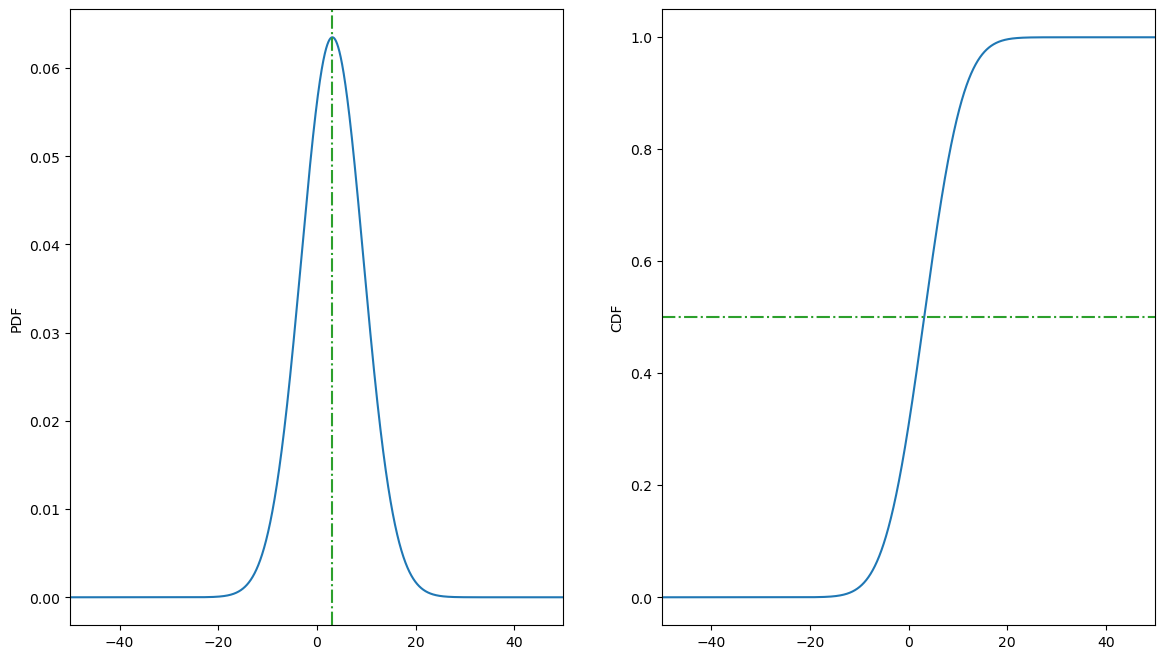

In [36]:

from scipy.stats import norm
bins=np.arange(-50,50,0.01)
PDF=norm.pdf(bins,loc=np.pi,scale=2*np.pi) #generates PDF in bins
CDF=norm.cdf(bins,loc=np.pi,scale=2*np.pi) #generates CDF in bins



#Now we plot the results


fig, ax  = plt.subplots(1,2,figsize=(14,8))
ax[0].plot(bins,PDF)
ax[0].set_ylabel("PDF")
ax[0].axvline(np.pi,ls='-.',color='tab:green')
#ax[0].set_yscale('log')
ax[0].set_xlim(-50,50)
ax[1].plot(bins,CDF)
ax[1].axhline(0.5,ls='-.',color='tab:green')
ax[1].set_ylabel("CDF")
ax[1].set_xlim(-50,50)
#plt.show()

Which produces the above plot:


Here we notice that the peak of the PDF equals the mean value of $\pi$ (denoted by vertical green line) and the value of where CDF = 0.5 also equals $\pi$ (horizontal green line).


One common practice is to fit a dataset into a distribution. That is, we have some data and then say "let's fit it with a normal distribution" or "let's fit it with a gamma distribution", etc. 

This can be accessed through the ``fit`` function.  E.g. ``scipy.stats.norm.fit``.

To demonstrate this idea, we generate some pseudo data through the ``rvs`` function (``norm.rvs``) which generates random numbers that follow a given distribution.

Here's an example:

3.010994732925715 6.353842255587542


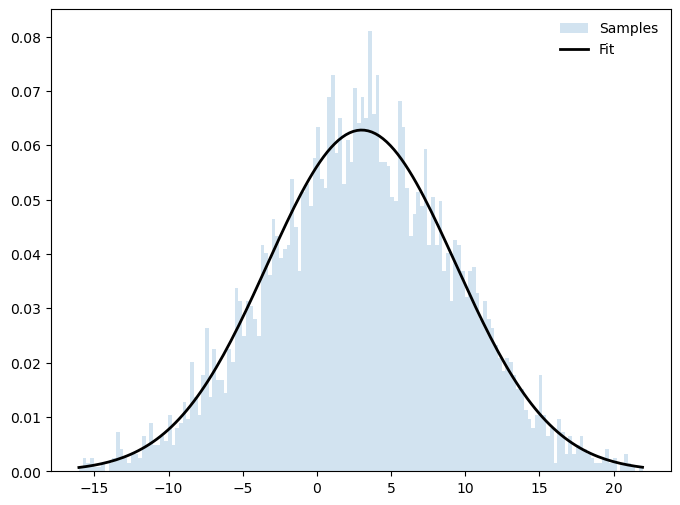

In [37]:
samples = norm.rvs(loc=np.pi, scale=2*np.pi, size=5000)  # random data set

mu, sigma = norm.fit(samples, method="MLE")  # do a maximum-likelihood fit
print(mu, sigma)

# Plot figure
bins = np.arange(mu - 3 * sigma, mu + 3 * sigma, 0.25)
bins2=bins
bins2=20
plt.hist(samples, density=True, histtype='stepfilled',
         alpha=0.2, label='Samples',bins=bins)
plt.plot(bins, norm.pdf(bins, loc=mu, scale=sigma),
         'k-', lw=2, label='Fit')
plt.legend(loc='best', frameon=False)
#plt.show()

This particular iterations produces a fitted mean of 3.267 and standard deviation of 6.17, which are very close to a mean of $\pi$ and standard deviation of 2$\pi$.   Repeating this simulation will give slightly different answers each time (since we are selecting random numbers _drawn from_ some distribution but we should expect qualitatively the same answer.

#### _Discrete Distributions_

_Discrete_ distributions describe the rate of occurances of discrete (countable) outcomes.  They contrast with continuous distributions, whcih can have outcomes that fall anywhere on a continuum.

SciPy contains several examples of discrete distributions, including ``bernoulli`` (Bernoulli distribution), ``binom`` (binomial distribution), ``poisson`` (Poisson distribution).   As with continous distributions, each call to a discrete distribution comes with some key functions, e.g. its PMF (probability mass function) and its CDF (cumulative distribution function).



**Binomial** 

A binomial distribution describes the number of successes in a series of $n$ independent draws, each with an outcome probability $p$ ("success" or "positive result") or probability $q$ ("failure" or "null result").    A single draw follows a Bernoulli distribution.  The binomial distribution provides the basis for the binomial statistical significance test.   

In any case, with a binomial distribution, the probability $p$ of $k$ "successful"/"positive result" outcomes given $n$ independent draws is:

$f(prob(k,n,p)) = \frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$

**Poisson**

The Poisson distribution is a simpler discrete distribution, measuring the probability of a given number of events happening in a specified time period.

It has a functional form of 

$f(prob(k,\lambda))$ = $\frac{\lambda^{k}e^{-\lambda}}{k!}$, where $\lambda$ is the expected rate of occurrences of a given event and $k$ is the number of occurrences.

In the simplest possible terms, you can think of a Poisson distribution as a binomial distribution the limit of an infinite number of draws and where the expected number of "successes" is constant with time.

**Bernoulli**

This is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q = 1 − p$.   It can be thought of as a binomial distribution where $n = 1$ (i.e. a single draw).

#### _Confidence Intervals_

In frequentist statistics (i.e. what we are dealing with), a confidence interval (CI) describes a range constructed from experimental data that will capture the true parameter value a certain percentage of the time across repeated experiments.
 

 E.g. you perform some type of experiment or procedure that yields data allowing you to measure something with value y.   There is a true value of the parameter that you are measuring but it is not immediately known.  What if you measure the same thing again but with a different instance of the same type of experiment? and again? and again? 
 
The confidence interval shows a range calculated by a given procedure that, across many repetitions of the same kind of procedure, would produce intervals containing the true parameter value a specified percentage of the time.   Say there is an interval that when derived from a number of separate experiments will contain the true parameter value 95% of the time. Applied to a single experiment, this resulting interval is then the "95 confidence interval".   The concept is intertwined with measurement uncertainties in physics and astronomy (e.g. the brightness of a star in a given passband), so you will hear this term thrown around a lot.  And there are deep misunderstandings about what these terms mean and even deeper confusion about how to calculate them in Python.     
 
 _Poisson statistics_ 

For Poisson distribution statistics, confidence intervals converge to being symmetric about the measured rate for large numbers of occurrences. Specifically, if we observe k occurrences in a sample of n trials, the rate $p$ = k/n has a 1-$\sigma$ confidence interval with 

Upper bound = p(1+q)
Lower bound = p(1-q)

where $q$ = $\sqrt{1/k + 1/n}$.  
 
 In the limit that $k$ is small compared to $n$, this further reduces to the symmetrical limits of $\sqrt{k}/n$.  So for example, if you detect 200 binary companions (or brown dwarfs or planets) around a sample of 1000 stars, then your frequency assuming Poisson statistics is 0.200 with upper and lower bounds of 0.215 and 0.185.

 

We can calculate the limits exactly using ``scipy.stats``

In [ ]:
from scipy import stats

# Data
k = 200  # number of companions detected
n = 1000 # number of stars observed
p = k / n  # measured rate

# For Poisson distribution, we use the Poisson parameter λ = k
# The 68% CI corresponds to (1-0.682)/2 = 0.159 on each tail
alpha = 1 - 0.682
lower_percentile = alpha / 2
upper_percentile = 1 - alpha / 2

# Exact Poisson confidence interval for the COUNT k
# Using the inverse CDF (percentile point function)
k_lower = stats.poisson.ppf(lower_percentile, k)
k_upper = stats.poisson.ppf(upper_percentile, k)

# Convert to rates by dividing by n
p_lower_exact = k_lower / n
p_upper_exact = k_upper / n

##print(f"Observed: k = {k} companions in n = {n} stars")
#print(f"Measured rate: p = {p:.4f}")
#print(f"\nExact Poisson 68.2% CI:")
#print(f"  Lower bound: {p_lower_exact:.4f}")
#print(f"  Upper bound: {p_upper_exact:.4f}")

print("Observed: k = {0:d} companions in n = {1:d} stars".format(k,n))
print("Measured rate: p = {0:.4f}".format(p))
print(f"\nExact Poisson 68.2% CI:")

print("  Lower bound: {0:.4f}".format(p_lower_exact))
#note: you can also write this as print(f"  Lower bound: {p_lower_exact:.4f}")
print("  Upper bound: {0:.4f}".format(p_upper_exact))
#print(f"  Upper bound: {p_upper_exact:.4f}") ditto



# Compare with a normal approximation
q = np.sqrt(1/k + 1/n)
p_lower_approx = p * (1 - q)
p_upper_approx = p * (1 + q)

print(f"\nNormal approximation 68.2% CI:")
print(f"  Lower bound: {p_lower_approx:.4f}")
print(f"  Upper bound: {p_upper_approx:.4f}")

print(f"\nDifference:")
print(f"  Lower: {abs(p_lower_exact - p_lower_approx):.4f}")
print(f"  Upper: {abs(p_upper_exact - p_upper_approx):.4f}")

 
 The limitations of Poisson statistics seems straightforward but in practice even professional researchers can ignore them.  For example, see this example where the author (Adam Burgasser, UCSD) lectures the field on using Poisson statistics for samples that are tens in size (!!!!), which is obviously from the above a no-go.
 
 [https://arxiv.org/pdf/astro-ph/0211470.pdf]()

 

E.g. as in the example above, if your parent sample is 10 and you have 2 detections and apply the Poisson uncertainty limits only valid for large samples that you can effectively treat as a continuous distribution, you get ...

 
 Since they are invalid, we have to use more appropriate statistics: binomial statistics.
 
  _Binomial statistics_ 
  
  
  And ... here's where things get complicated and documentation you may find gives wildly different impressions of the "right" approach.
  
So if you have a probability distribution (i.e. a curve with some area) x fraction of that area will lie within two numbers.   Here's an example from the Burgasser et al paper I mentioned above:

![](./figures/burgasser_pdf.png)

The simple interpretation of, say, a 68% confidence interval is "shaded region about the mean comprising 68% of the total area".   And that would be exactly true in the case of a _flat prior_ (uniform prior) on the distribution.  The reality is that the exact confidence interval calculated in a binomial distribution is a non-trivial calculation.  In fact this widely-cited paper has a long, blunt discussion (er rant) about confidence intervals):
[https://core.ac.uk/download/pdf/132271468.pdf]()

The key is to know _what_ you are calculating and understand the limitations/assumptions.


 Here are your options and how to calculate them in SciPy:


* **Flat Prior** -- A flat (uniform) prior on the binomial proportion over the range 0 to 1 (i.e. from never occurring to occurring in every experiment).  The posterior density function is a Beta distribution: $\beta$(k + 1, n - k + 1).   In SciPy upper and lower bounds are computed by the inverse $\beta$ function, which is this horrendous-looking thing ...

![](./figures/inverse_beta.png)

The implementation SciPy is less horrendous ...

```
from scipy.special import betaincinv

alpha=1-confidence_interval #e.g. 0.68 for 68% CI

lowerbound = betaincinv(k + 1, n - k + 1, 0.5 * alpha)
upperbound = betaincinv(k + 1, n - k + 1, 1.0 - 0.5 * alpha)

```

Here, we can recover Burgasser's quoted confidence interval:

In [47]:
from scipy.special import betaincinv
k=2
n=10
confidence_interval=0.682 #exact val for 1-sigma CI
alpha=1-confidence_interval #e.g. 0.68 for 68% CI

lowerbound = betaincinv(k + 1, n - k + 1, 0.5 * alpha)
upperbound = betaincinv(k + 1, n - k + 1, 1.0 - 0.5 * alpha)

print(lowerbound)
#0.12845821647659547
print(upperbound)
#0.373010124833298

0.12845821647659555
0.37301012483329804


This understanding of a confidence interval is what I "grew up" with in pre-Python (IDL) days.

* **Jeffrys Interval** -- This interval is derived by applying Bayes’ theorem to the binomial distribution with the noninformative Jeffreys prior. The noninformative Jeffreys prior is the Beta distribution, Beta(1/2, 1/2), which has the density function.  The posterior density function is a Beta distribution: $\beta$(k + 1/2, n - k + 1/2). 

The general "expert" consensus is that the Jeffreys Prior is "better".

In [48]:

k=2
n=10
confidence_interval=0.682 #exact val for 1-sigma CI
alpha=1-confidence_interval #e.g. 0.682 for 68% CI

lowerbound = betaincinv(k + 1/2, n - k + 1/2, 0.5 * alpha)
upperbound = betaincinv(k + 1/2, n - k + 1/2, 1.0 - 0.5 * alpha)

print(lowerbound)
#0.10563168409670065
print(upperbound)
#0.350859220932479


0.10563168409670068
0.3508592209324789


As you see, the answers are _slightly_ different than a flat prior.

 
* **Wilson Interval** 

This interval, attributed to Wilson [2], is given by 
$CI_{\rm Wilson} = \frac{k + \kappa^2/2}{n + \kappa^2}
        \pm \frac{\kappa n^{1/2}}{n + \kappa^2}
        ((\hat{\epsilon}(1 - \hat{\epsilon}) + \kappa^2/(4n))^{1/2}$,
        

where $\hat{\epsilon} = k / n$ and $\kappa$ is the
    number of standard deviations corresponding to the desired
    confidence interval for a *normal* distribution (for example,
    1.0 for a confidence interval of 68.269%). For a
    confidence interval of 100(1 - $\alpha$)%, $\kappa = \Phi^{-1}(1-\alpha/2) = \sqrt{2}{\rm erf}^{-1}(1-\alpha)$.   
    
    
Now, this looks truly "involved".  Thankfully SciPy has decided to have a canned function especially for it, using the ``binomtest.proportion_ci`` function.   The call is pretty simple:

```from scipy.stats import binomtest``` 

then

 ``binomtest(k,n).proportion_ci(method='wilson',confidence_level=[confidence level]``
 
 E.g. for a 1-$\sigma$ confidence interval (68.2% or 0.682) for our example of $k=2$ and $n=10$
 
 

In [52]:

from scipy.stats import binomtest
#binomtest(2,10).proportion_ci(method='wilson',confidence_level=0.682)

#ConfidenceInterval(low=0.10372027242788966, high=0.3506840498201643)

#you can access the specific values by calling the "low" and "high" properties

result=binomtest(2,10).proportion_ci(method='wilson',confidence_level=0.682)
#result=binomtest(2,10).proportion_ci(method='wilson',confidence_level=0.954)
print(result.low)   
#0.10372027242788966
print(result.high)
#0.3506840498201643


0.10372027242788966
0.3506840498201643


This value gets _really_ close to a Jeffreys prior. 


* **exact** (aka Clopper-Pearson method)  - calling this an "exact" method may be a bit questionable (particularly to the authors of the paper listed above) but I include it for completeness since the function call is pretty straightforward (like Wilson except just a slightly different keyword)

In [50]:
from scipy.stats import binomtest
binomtest(2,10).proportion_ci(method='exact',confidence_level=0.682)
#Confidene Interval(low=0.07205052578034218, high=0.405232091711883)

ConfidenceInterval(low=0.07205052578034218, high=0.405232091711883)

So which to use?   Depends.  The Wilson and Jeffreys prior are recommended by that paper.   My advice (which is true for code in general): just understand clearly which method you are using and clearly communicate that to others.

However, as in the example above, if your parent sample is 10 and you have 2 detections and apply the Poisson uncertainty limits only valid for large samples that you can effectively treat as a continuous distribution, you get ...

In [51]:
k=2
n=10

q = np.sqrt(1/k + 1/n)
p_lower_approx = p * (1 - q)
p_upper_approx = p * (1 + q)

print(f"\nNormal approximation 68.2% CI:")
print(f"  Lower bound: {p_lower_approx:.4f}")
print(f"  Upper bound: {p_upper_approx:.4f}")


Normal approximation 68.2% CI:
  Lower bound: 0.0451
  Upper bound: 0.3549


... which is clearly different